# Customer Transaction Prediction

#### MADE BY TEAM ID : PTID-CDS-JUN-23-1533

#### PROJECT ID : PRCP-1025-Flightpriceprediction

## Team ID: PTID-CDS-JUN-23-1533
### Team Member :
01. Kowshik B C koushikoushik17@gmail.com
02. DIVYA Poorani CHINTUDIVI@gmail.com
03. Praveen venka  praveensevenhills@gmail.com
04. Masud Rana m.rana24june@gmail.com

# BUSINESS CASE - To predict the Customer Transaction Prediction

* This information can be used to enhance marketing strategies, improve customer experience, optimize inventory management, and drive overall business growth. By accurately forecasting customer transactions, businesses can personalize interactions, design targeted campaigns, optimize inventory levels, increase revenue, and improve operational efficiency. The implementation of a predictive system brings benefits such as improved marketing campaigns, enhanced customer experience, optimal inventory management, revenue optimization, and fraud detection. Key performance indicators, including prediction accuracy

##### This notebook contains various ML Model which will be able to predict Customer Transaction Prediction

# PROBLEM DEFINITION

* Prepare a complete data analysis report on the given data.
* Create a predictive model which will help the bank to identify which customer will make transactions in future.

# Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading.. File

# Here, We are loading the dataset by using the pandas

In [2]:
train = pd.read_csv('train(1).csv')

In [3]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


# Domain analysis 

# Basic checks

In [5]:
# Displaying the first 5 rows of the dataset using the 'head()' function 

train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
# Displaying the last 5 rows of the dataset using the 'head()' function 

train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [7]:
# Printing all the column from the dataframe

train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [8]:
# Printing the number of rows and columns using the "shape()" function

train.shape

(200000, 202)

In [9]:
# Basic information about the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [10]:
# Checking for null values

train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [11]:
# It will discribe all the characters

train.describe(include=['O'])

,ID_code
count,200000
unique,200000
top,train_0
freq,1


In [12]:
# checking for the duplicated values

train.loc[train.duplicated()]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


* There are no duplicated data which we have to remove.

In [13]:
# Check null values
train.isnull().values.any()

False

In [14]:
# Getting Statistical data from the dataset

train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# Exploratory Data Analysis

# Data preprocesing

In [15]:
# Checking for null values

train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

### Droping unwanted data

In [16]:
train.drop(["ID_code"],axis = 1,inplace= True)

In [17]:
from sklearn.decomposition import PCA

In [18]:
## creating X and y
x = train.drop(["target"],axis=1)
y = train['target'] #dependent variabel or target

### Reducing dimension by Extratreeregression

In [19]:
from sklearn.decomposition import PCA

In [20]:
### As features are more and column names are unknown as process of diemensinality reduction we choosen  PCA
pca = PCA(n_components = 0.95, svd_solver = 'full')
X_pca = pca.fit_transform(x)
X_pca

array([[ -5.60646899, -23.55440926,  -1.899704  , ...,   5.41563294,
          1.98110756,   5.4449445 ],
       [ 34.87802792,  11.46929107,  -3.75977398, ...,  -2.92756827,
         -0.47994981,  -2.75461323],
       [ -4.79023946,  -0.33421344,  11.35931802, ...,   1.1990427 ,
         -2.04303563,   4.956015  ],
       ...,
       [ 36.84227048,   7.76008289,  30.23221393, ...,   1.26350447,
          4.61521089,   0.41376635],
       [ 30.23091675, -24.4235161 ,  25.55355302, ...,   5.882554  ,
         -0.32885376,   2.80609371],
       [ -5.99488377,   7.69716402,  10.11166579, ...,  -4.22976642,
         -1.09201667,   1.02511155]])

In [21]:
X_pca.shape

(200000, 111)

#### scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(X_pca)

#### Balanceing the Dataset

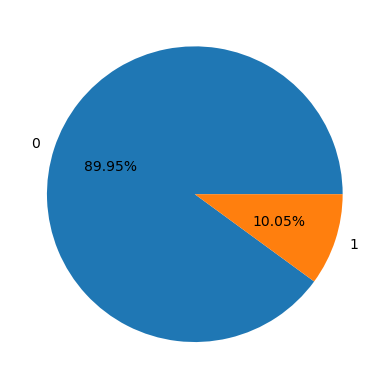

In [23]:
plt.pie(train["target"].value_counts(),labels=train["target"].unique(),autopct="%0.2f%%")
plt.show()

* Data is Imbalance

In [24]:
# Balance Dataset by doing SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x , y = smote.fit_resample(x,y)

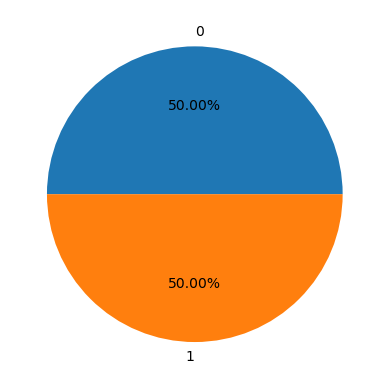

In [25]:
plt.pie(y.value_counts(),labels=y.unique(),autopct="%0.2f%%")
plt.show()

* Data is balance

# Model Creation and Model Evaluation

### Spliting data for train and test

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test =  train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

### 1.Logistic Regression

In [27]:
# create Linear Regression model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()   # object creation
LR.fit(x_train,y_train) # Training the model
y_pred=LR.predict(x_test)# Test prediction
y1_pred = LR.predict(x_train) # Train prediction

In [28]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [29]:
y_test.values

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

### Evaluation Matrix for Logistic Regression

In [30]:
y.value_counts()

0    179902
1    179902
Name: target, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [32]:
precision_score(y_test, y_pred)

0.722587839567109

In [33]:
recall_score(y_test, y_pred)

0.7323747938707824

In [34]:
f1_score(y_test, y_pred)

0.7274484002466113

In [35]:
confusion_matrix(y_test, y_pred)

array([[38796, 15175],
       [14444, 39527]], dtype=int64)

In [36]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 0.7280375761329617
Test_Accuracy: 0.7256026384539845


In [37]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.731563,0.724618,0.728038,0.728090,0.728090
recall,0.720426,0.735649,0.728038,0.728038,0.728038
f1-score,0.725952,0.730092,0.728038,0.728022,0.728022
support,125931.000000,125931.000000,0.728038,251862.000000,251862.000000


In [38]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.728700,0.722588,0.725603,0.725644,0.725644
recall,0.718830,0.732375,0.725603,0.725603,0.725603
f1-score,0.723732,0.727448,0.725603,0.725590,0.725590
support,53971.000000,53971.000000,0.725603,107942.000000,107942.000000


### 2.KNNeighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()   # object creation
knn.fit(x_train,y_train) # Training the model
y_pred=knn.predict(x_test)  # Test prediction
y1_pred = knn.predict(x_train) # Train prediction

In [40]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
y_test.values

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

### Evaluation Matrix for KNNeighbors

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [43]:
precision_score(y_test, y_pred)

0.5008119368637894

In [44]:
recall_score(y_test, y_pred)

1.0

In [45]:
f1_score(y_test, y_pred)

0.6673879978731034

In [46]:
confusion_matrix(y_test, y_pred)

array([[  175, 53796],
       [    0, 53971]], dtype=int64)

In [47]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 0.5087468534356115
Test_Accuracy: 0.5016212410368531


In [48]:
# Evaluating theclassification_report classification report of the train data
pd.DataFrame((y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.504412,0.508747,0.752206,0.752206
recall,0.017494,1.000000,0.508747,0.508747,0.508747
f1-score,0.034386,0.670577,0.508747,0.352481,0.352481
support,125931.000000,125931.000000,0.508747,251862.000000,251862.000000


In [49]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.500812,0.501621,0.750406,0.750406
recall,0.003242,1.000000,0.501621,0.501621,0.501621
f1-score,0.006464,0.667388,0.501621,0.336926,0.336926
support,53971.000000,53971.000000,0.501621,107942.000000,107942.000000


* This data is so big that's why I skipping this  model it will take too much time for this model

### Evaluation Matrix for Support Vector Machine- Classifier

# 4.Decission Tree Algorithm

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y1_pred = dtc.predict(x_train) # Train prediction

In [51]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [52]:
y_test

150955    0
144887    0
245689    1
304536    1
305056    1
         ..
261360    1
205007    1
240755    1
138342    0
356991    1
Name: target, Length: 107942, dtype: int64

### Evaluation Matrix for decission tree

In [53]:
pcc = precision_score(y_test, y_pred)
pcc

0.7386614574486156

In [54]:
rcc = recall_score(y_test, y_pred)
rcc

0.8057104741435215

In [55]:
fc = f1_score(y_test, y_pred)
fc

0.7707304968938594

In [56]:
confusion_matrix(y_test, y_pred)

array([[38586, 15385],
       [10486, 43485]], dtype=int64)

In [57]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.7603249893461304


In [58]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,125931.0,125931.0,1.0,251862.0,251862.0


In [59]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.786314,0.738661,0.760325,0.762488,0.762488
recall,0.714940,0.805710,0.760325,0.760325,0.760325
f1-score,0.748930,0.770730,0.760325,0.759830,0.759830
support,53971.000000,53971.000000,0.760325,107942.000000,107942.000000


# 5.Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
y1_pred = dtc.predict(x_train) 

In [61]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [62]:
y_test

150955    0
144887    0
245689    1
304536    1
305056    1
         ..
261360    1
205007    1
240755    1
138342    0
356991    1
Name: target, Length: 107942, dtype: int64

### Evaluation Matrix for Random Forest Classifier

In [63]:
prc = precision_score(y_test, y_pred)
prc

0.9648956723338485

In [64]:
rcc = recall_score(y_test, y_pred)
rcc

0.9253673268977785

In [65]:
fc = f1_score(y_test, y_pred)
fc

0.9447181999602765

In [66]:
confusion_matrix(y_test, y_pred)

array([[52154,  1817],
       [ 4028, 49943]], dtype=int64)

In [67]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.9458505493691056


In [68]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,125931.0,125931.0,1.0,251862.0,251862.0


In [69]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.928304,0.964896,0.945851,0.946600,0.946600
recall,0.966334,0.925367,0.945851,0.945851,0.945851
f1-score,0.946937,0.944718,0.945851,0.945828,0.945828
support,53971.000000,53971.000000,0.945851,107942.000000,107942.000000


# 6. Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
# Creating a Naive Bayes classifier
clf = GaussianNB()
# Training the classifier on the training set
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y1_pred = dtc.predict(x_train)

### Evaluation Matrix for Random Forest Classifier

In [71]:
prc = precision_score(y_test, y_pred)
prc

0.8681861618852043

In [72]:
rcc = recall_score(y_test, y_pred)
rcc

0.7911656259843249

In [73]:
fc = f1_score(y_test, y_pred)
fc

0.8278883998681582

In [74]:
confusion_matrix(y_test, y_pred)

array([[47488,  6483],
       [11271, 42700]], dtype=int64)

In [75]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.8355227807526264


In [76]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,125931.0,125931.0,1.0,251862.0,251862.0


In [77]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.808183,0.868186,0.835523,0.838184,0.838184
recall,0.879880,0.791166,0.835523,0.835523,0.835523
f1-score,0.842509,0.827888,0.835523,0.835199,0.835199
support,53971.000000,53971.000000,0.835523,107942.000000,107942.000000


# 7. Neural Network

In [78]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,))
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y1_pred = dtc.predict(x_train)

# Evaluation Matrix for Random Forest Classifie

In [79]:
prc = precision_score(y_test, y_pred)
prc

0.8270699885681104

In [80]:
rcc = recall_score(y_test, y_pred)
rcc

0.8445090882140409

In [81]:
fc = f1_score(y_test, y_pred)
fc

0.8356985698569858

In [82]:
confusion_matrix(y_test, y_pred)

array([[44441,  9530],
       [ 8392, 45579]], dtype=int64)

In [83]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.8339663893572474


In [84]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,125931.0,125931.0,1.0,251862.0,251862.0


In [85]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.841160,0.827070,0.833966,0.834115,0.834115
recall,0.823424,0.844509,0.833966,0.833966,0.833966
f1-score,0.832197,0.835699,0.833966,0.833948,0.833948
support,53971.000000,53971.000000,0.833966,107942.000000,107942.000000


# Comparison Report of the Models

In [90]:
!pip install prettytable

In [91]:
from prettytable import PrettyTable
x=PrettyTable()

In [92]:
x.field_names = ["Model","(test)Accuracy", "(train)Accuracy"]
x.add_row(["Logistic Regression",'72.3 %','72.5%'])
x.add_row(["Decision Trees Classifier",' 76 %','98 %'])
x.add_row(["Random Forest Classifier", '94 %','100 %'])
x.add_row(["K-Nearest Neighbor Classifier", '49 %','50%'])
x.add_row(["Naive Bayes classifier",'83.5 %','83.3 %'])
x.add_row(["Neural Network classifier",'82.2%','84.1 %'])

In [93]:
print(x)

+-------------------------------+----------------+-----------------+
|             Model             | (test)Accuracy | (train)Accuracy |
+-------------------------------+----------------+-----------------+
|      Logistic Regression      |     72.3 %     |      72.5%      |
|   Decision Trees Classifier   |      76 %      |       98 %      |
|    Random Forest Classifier   |      94 %      |      100 %      |
| K-Nearest Neighbor Classifier |      49 %      |       50%       |
|     Naive Bayes classifier    |     83.5 %     |      83.3 %     |
|   Neural Network classifier   |     82.2%      |      84.1 %     |
+-------------------------------+----------------+-----------------+


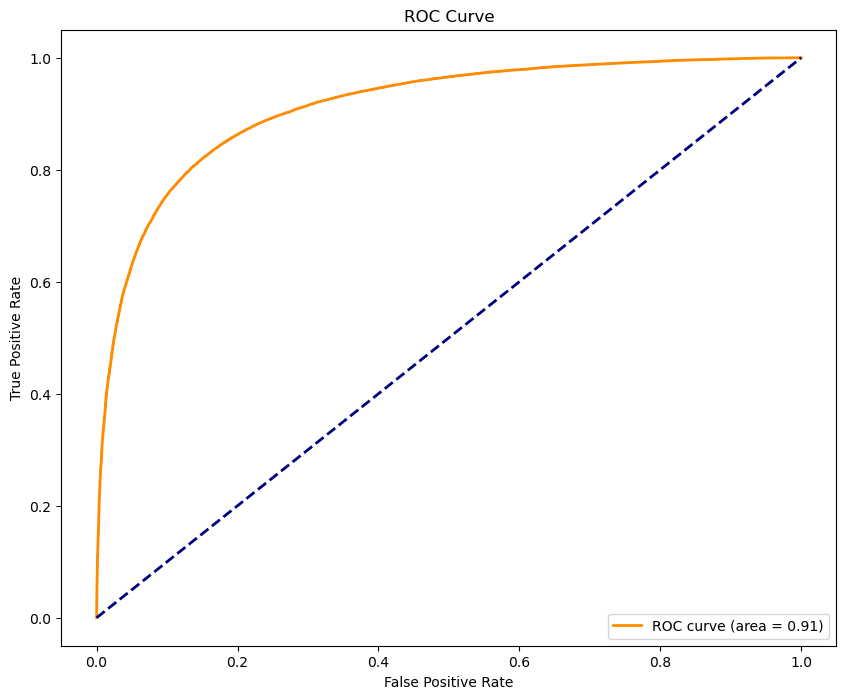

AUC Score: 0.91192217569538


In [94]:
from sklearn.metrics import roc_curve, auc


# Predicting probabilities on test data
y_prob = clf.predict_proba(x_test)[:, 1]

# Computing ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Printing AUC score
print("AUC Score:", roc_auc)

# Conclusion 

* Random Forest Classifier: The random forest classifier has a training accuracy of 100% and a testing accuracy of 94%. This suggests that the model is likely to perform well on new data.

* KNN Classifier: The KNN classifier has a training accuracy of 50% and a testing accuracy of 49%. This indicates that the model is not performing well and may require further optimization.

* Naive Bayes Classifier: The Naive Bayes classifier has a training accuracy of 83.3% and a testing accuracy of 83.5%. This indicates that the model is performing well and is able to generalize to new data.

* Neural Network Classifier: The neural network classifier has a training accuracy of 84.1% and a testing accuracy of 82.2%. Although the training accuracy is slightly better than the testing accuracy, the model seems to be performing well.

* In conclusion, the random forest classifier, Naive Bayes classifier, and neural network classifier seem to be the best performing models, as they have high testing accuracies and are likely to generalize well to new data. The decision tree classifier, KNN classifier, logistic regression, and support vector classifier may require further optimization to improve their performance.

In [1]:
pwd

'C:\\Users\\koushik toni'